In [35]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from numpy.random import randn
from scipy.stats import shapiro, spearmanr

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'C:/Users/vlad1/Desktop/Рабочий стол/ML/Employers/Deeplay/Group_Style.xlsx'

data = pd.read_excel(path)
data.head()

,player,stat1,stat2,stat3,stat4,stat5,stat6,stat7,stat8,stat9,...,stat118,stat119,stat120,stat121,stat122,stat123,stat124,stat125,stat126,stat127
0,gr_player1,0.000000,0.551756,NaN,0.227376,0.089159,NaN,0.625330,NaN,0.080153,...,0.450982,0.205062,0.326149,0.255466,0.294282,0.002488,NaN,0.265898,NaN,NaN
1,gr_player2,0.000000,0.559532,NaN,0.197149,0.109987,NaN,0.685624,NaN,0.120219,...,0.438461,0.223621,0.325301,0.274218,0.289307,0.013705,NaN,0.251024,NaN,NaN
2,gr_player3,0.000013,0.542488,NaN,0.193920,0.079732,NaN,0.619612,NaN,0.072533,...,0.443868,0.197362,0.323240,0.256494,0.303659,0.005041,NaN,0.258904,NaN,NaN
3,gr_player4,0.000000,0.560295,NaN,0.228996,0.078283,NaN,0.626145,NaN,0.049505,...,0.439452,0.201277,0.311881,0.253795,0.292665,0.005589,NaN,0.244630,NaN,NaN
4,gr_player5,0.000102,0.592927,NaN,0.231728,0.057743,NaN,0.597334,NaN,0.058140,...,0.426566,0.202446,0.322222,0.267663,0.296040,0.004804,NaN,0.255882,NaN,NaN


In [3]:
data_stat = data.copy()
data_stat.drop(['player'], inplace=True, axis=1)
data_stat.head()

,stat1,stat2,stat3,stat4,stat5,stat6,stat7,stat8,stat9,stat10,...,stat118,stat119,stat120,stat121,stat122,stat123,stat124,stat125,stat126,stat127
0,0.000000,0.551756,NaN,0.227376,0.089159,NaN,0.625330,NaN,0.080153,NaN,...,0.450982,0.205062,0.326149,0.255466,0.294282,0.002488,NaN,0.265898,NaN,NaN
1,0.000000,0.559532,NaN,0.197149,0.109987,NaN,0.685624,NaN,0.120219,NaN,...,0.438461,0.223621,0.325301,0.274218,0.289307,0.013705,NaN,0.251024,NaN,NaN
2,0.000013,0.542488,NaN,0.193920,0.079732,NaN,0.619612,NaN,0.072533,NaN,...,0.443868,0.197362,0.323240,0.256494,0.303659,0.005041,NaN,0.258904,NaN,NaN
3,0.000000,0.560295,NaN,0.228996,0.078283,NaN,0.626145,NaN,0.049505,NaN,...,0.439452,0.201277,0.311881,0.253795,0.292665,0.005589,NaN,0.244630,NaN,NaN
4,0.000102,0.592927,NaN,0.231728,0.057743,NaN,0.597334,NaN,0.058140,NaN,...,0.426566,0.202446,0.322222,0.267663,0.296040,0.004804,NaN,0.255882,NaN,NaN


# EDA

## Создадим класс, для обработки данных

In [4]:
class preprocess():
    
    # Метод формирования словаря пропусков
    def get_pass_dict(data):

        pass_dict = {}

        for col in data.columns:
            pass_count = data[col].isna().sum()
            pass_dict[col] = (pass_count/len(data))*100

        return pass_dict

    
    # Метод формирования списка атрибутов на удаления
    def get_drop_list(pass_dict, margin):  
    
        drop_list = []

        for key in pass_dict.keys():
            if pass_dict[key] > margin:
                drop_list.append(key)

        return drop_list


    # Метод удаления колонок по заданному списку
    def del_col(drop_list, data):    
        
        for col in drop_list:
            data.drop([col], inplace=True, axis=1)
            
    # Метод получения сильно коррелированных пар атрибутов
    def get_corr(data, margin):
   
        cor = data.corr(method='spearman')
        c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
        all_cor = c1[c1.values != 1]   
        all_cor = all_cor[abs(all_cor) > margin]

        print(len(all_cor), '- количество пар')

        return all_cor

    # Метод удаления сильно коррелированных столбцов
    def del_cor_col(data, cor_val):
 
        for st in cor_val:
            rand_num = np.random.randint(0,2)
            try:
                col_name = st[1][rand_num]
                preprocess.del_col([col_name], data)
            except:
                pass


In [5]:
# производим удаление колонок с пропусками выше заданного порога

pass_dict = preprocess.get_pass_dict(data_stat)
drop_list = preprocess.get_drop_list(pass_dict, 10)
preprocess.del_col(drop_list, data_stat)
pass_dict = preprocess.get_pass_dict(data_stat)
print(len(pass_dict))
pass_dict

97


{'stat1': 0.0,
 'stat2': 0.0,
 'stat4': 0.0,
 'stat5': 0.0,
 'stat7': 0.0,
 'stat9': 0.0,
 'stat11': 0.0,
 'stat12': 0.0,
 'stat13': 0.0,
 'stat14': 0.0,
 'stat15': 0.0,
 'stat16': 0.0,
 'stat17': 0.0,
 'stat19': 0.0,
 'stat20': 0.0,
 'stat22': 0.0,
 'stat23': 0.0,
 'stat24': 0.0,
 'stat25': 0.0,
 'stat27': 0.0,
 'stat30': 0.0,
 'stat32': 0.0,
 'stat33': 0.0,
 'stat35': 0.0,
 'stat36': 0.0,
 'stat37': 0.0,
 'stat38': 0.0,
 'stat39': 0.0,
 'stat40': 0.0,
 'stat41': 0.0,
 'stat42': 0.0,
 'stat43': 0.0,
 'stat44': 0.0,
 'stat45': 0.0,
 'stat46': 0.0,
 'stat47': 0.0,
 'stat48': 0.0,
 'stat49': 0.0,
 'stat50': 0.0,
 'stat51': 0.0,
 'stat54': 0.0,
 'stat55': 0.0,
 'stat56': 0.0,
 'stat57': 0.0,
 'stat58': 0.0,
 'stat59': 0.0,
 'stat60': 0.0,
 'stat61': 0.0,
 'stat63': 0.0,
 'stat64': 0.0,
 'stat65': 0.0,
 'stat66': 0.0,
 'stat68': 0.0,
 'stat69': 0.0,
 'stat70': 0.0,
 'stat71': 0.0,
 'stat72': 0.0,
 'stat73': 0.0,
 'stat74': 0.0,
 'stat75': 0.0,
 'stat76': 0.0,
 'stat77': 0.0,
 'stat78': 0.0

**Поиск выбросов**

In [6]:
min_val_col = data_stat.min().values[:]
for i, val in enumerate(min_val_col):
    if val < 0:
        print(i)
        
max_val_col = data_stat.max().values[:]
for i, val in enumerate(max_val_col):
    if val > 1:
        print(i)

40


In [7]:
data_stat.iloc[:, 40][:10]

0    2.712824
1    4.271127
2    2.887455
3    3.310973
4    2.847141
5    3.004784
6    2.654007
7    2.573916
8    3.159627
9    2.694875
Name: stat54, dtype: float64

In [8]:
preprocess.del_col(['stat54'], data_stat)

**Понижение размерности**

In [9]:
data_stat_copy = data_stat.copy(deep=True)

In [10]:
all_cor = preprocess.get_corr(data_stat_copy, 0.7)

147 - количество пар


In [11]:
# выносим значения мультииндексов в отдельный столбец

all_cor = pd.DataFrame(all_cor)
all_cor['index'] = all_cor.index.to_numpy()

cor_val = all_cor.values

In [12]:
all_cor

,,0,index
stat4,stat70,0.994840,"(stat4, stat70)"
stat113,stat2,0.993308,"(stat113, stat2)"
stat94,stat104,0.987663,"(stat94, stat104)"
stat104,stat30,0.984277,"(stat104, stat30)"
stat110,stat43,0.980729,"(stat110, stat43)"
...,...,...,...
stat14,stat74,-0.809386,"(stat14, stat74)"
stat115,stat45,-0.831963,"(stat115, stat45)"
stat16,stat11,-0.850185,"(stat16, stat11)"
stat11,stat111,-0.877923,"(stat11, stat111)"


In [13]:
preprocess.del_cor_col(data_stat_copy, cor_val)
data_stat_copy

,stat1,stat9,stat20,stat24,stat25,stat27,stat32,stat35,stat40,stat44,...,stat96,stat97,stat99,stat102,stat107,stat109,stat113,stat120,stat122,stat125
0,0.000000,0.080153,0.682451,0.589975,0.388889,0.000167,0.153299,0.522408,0.168998,0.095759,...,0.122807,0.000000,0.059983,0.043714,0.848151,0.078958,0.546556,0.326149,0.294282,0.265898
1,0.000000,0.120219,0.661765,0.569231,0.346008,0.000000,0.182482,0.520548,0.223449,0.084194,...,0.133929,0.000000,0.052230,0.075017,0.861720,0.087807,0.542703,0.325301,0.289307,0.251024
2,0.000013,0.072533,0.625175,0.598868,0.361179,0.000041,0.190028,0.574866,0.194468,0.088117,...,0.189627,0.000000,0.060695,0.071754,0.845899,0.082739,0.533929,0.323240,0.303659,0.258904
3,0.000000,0.049505,0.603774,0.566474,0.395349,0.000000,0.153191,0.531612,0.192038,0.130584,...,0.071429,0.000000,0.078217,0.076115,0.845667,0.071453,0.554675,0.311881,0.292665,0.244630
4,0.000102,0.058140,0.613527,0.558074,0.371429,0.000193,0.194763,0.512048,0.179187,0.125191,...,0.172414,0.000000,0.092486,0.075356,0.815354,0.075931,0.587243,0.322222,0.296040,0.255882
5,0.000000,0.118012,0.641732,0.636142,0.350242,0.000000,0.139764,0.559446,0.212005,0.093186,...,0.130612,0.000000,0.075999,0.050718,0.860864,0.095300,0.506672,0.280880,0.277642,0.256774
6,0.000099,0.121212,0.579787,0.621479,0.311594,0.000160,0.142380,0.562296,0.185028,0.121739,...,0.098765,0.000000,0.077286,0.075230,0.835681,0.093736,0.528566,0.270270,0.308804,0.264102
7,0.000000,0.112676,0.575342,0.671348,0.307018,0.000000,0.133208,0.619380,0.211220,0.079589,...,0.100840,0.000000,0.070317,0.069456,0.850547,0.089237,0.503948,0.353488,0.322072,0.265466
8,0.000000,0.081694,0.622177,0.595212,0.411765,0.000269,0.165576,0.522656,0.175451,0.131347,...,0.153846,0.000000,0.065986,0.073083,0.831355,0.069543,0.599789,0.297778,0.308087,0.259948
9,0.000066,0.095745,0.716216,0.662393,0.309524,0.000000,0.140187,0.500000,0.222508,0.097458,...,0.163265,0.000000,0.092365,0.096282,0.832561,0.074715,0.528953,0.293785,0.278220,0.249461


In [14]:
# отделяем играков группы и новых игроков

data_group = data_stat_copy.iloc[:-4]
data_new = data_stat_copy.iloc[-4:]

In [15]:
data_new

,stat1,stat9,stat20,stat24,stat25,stat27,stat32,stat35,stat40,stat44,...,stat96,stat97,stat99,stat102,stat107,stat109,stat113,stat120,stat122,stat125
49,0.000000,0.122222,0.554286,0.661972,0.333333,0.000000,0.151515,0.447447,0.209222,0.119816,...,0.204545,0.0,0.106143,0.018113,0.777582,0.098227,0.550725,0.501706,0.165283,0.237372
50,0.000000,0.090349,0.600365,0.553263,0.280528,0.000000,0.165307,0.562118,0.192917,0.107486,...,0.144487,0.0,0.067949,0.084375,0.843079,0.082126,0.511305,0.326512,0.304442,0.274538
51,0.000043,0.081690,0.631579,0.584034,0.340278,0.000000,0.202076,0.520905,0.199306,0.101271,...,0.118841,0.0,0.074175,0.081616,0.860575,0.078143,0.507210,0.275281,0.288211,0.263282
52,0.000000,0.045872,0.434783,0.606796,0.526316,0.000677,0.151515,0.552331,0.189431,0.090361,...,0.157407,0.0,0.049020,0.023632,0.848052,0.062849,0.427368,0.440329,0.188433,0.277410


# Нахождение диапазонов показателей, которые характеризуют стиль игры данной группы

In [16]:
# Функция печати информации о кластере

def printCluster(x, dec):
       
    print("Размер кластера:", x.shape[0]) # Выведем количество элементов в кластере
  
    mX   = x.mean(axis=0)              # Считаем среднее значение по кластеру  
    mX = np.around(mX, decimals = dec)
    mX = mX.reshape(1, mX.shape[0])
    
    minX = x.min(axis=0)               # Находим минимальное значение в кластере
    minX = np.around(minX, decimals = dec)
    minX = minX.reshape(1, minX.shape[0])
    
    maxX = x.max(axis=0)               # Находим максимальное значение в кластере
    maxX = np.around(maxX, decimals = dec)
    maxX = maxX.reshape(1, maxX.shape[0])
    
    stdX = x.std(axis=0)               # Находим стандартное отклонение элементов кластера
    stdX = np.around(stdX, decimals = dec)    
    stdX = stdX.reshape(1, stdX.shape[0])
    
    l_np = [mX, minX, maxX, stdX]
    
    np_all = reduce(lambda n1,n2: np.concatenate((n1,n2), axis=0), l_np) 
   
    return np_all

In [17]:
# Функция визуализации среднего, минимального, максимального и стандартного отклонения 
# stat в каждом кластере

def show_clust_inf(data, labels, dec):      

    for n in set(labels):
        
        clust = data[data['labels'] == n]
        del_col(['labels'], clust)

        clust_v = clust.values

        clust_inf = printCluster(clust_v, dec)

        plt.figure(figsize=(10,10))
        plt.imshow(clust_inf, cmap='rainbow') #interpolation='nearest', )
        plt.colorbar(location='right', anchor=(0, 0.5), shrink=0.1)
        plt.show()

In [18]:
info = printCluster(data_group.values, 5)

Размер кластера: 49


In [19]:
info

array([[3.0000e-05, 8.8130e-02, 6.4350e-01, 5.9083e-01, 3.5705e-01,
        1.5000e-04, 1.6584e-01, 5.3967e-01, 1.8778e-01, 1.0510e-01,
        4.5031e-01, 3.0608e-01, 3.7767e-01, 7.2641e-01, 1.4572e-01,
        6.0410e-02, 5.5110e-02, 2.4945e-01, 6.1890e-01, 2.0283e-01,
        1.0946e-01, 2.0000e-04, 3.3096e-01, 4.5559e-01, 6.8410e-02,
        1.4732e-01, 2.0000e-05, 7.3170e-02, 7.4960e-02, 8.3961e-01,
        8.0200e-02, 5.3328e-01, 3.1742e-01, 3.0284e-01, 2.6432e-01],
       [0.0000e+00, 3.0930e-02, 5.5133e-01, 4.3066e-01, 1.1538e-01,
        0.0000e+00, 1.2688e-01, 4.6468e-01, 1.6574e-01, 6.2880e-02,
        3.8399e-01, 2.5000e-01, 3.0337e-01, 6.0256e-01, 9.3160e-02,
        3.3890e-02, 3.9280e-02, 2.0183e-01, 5.4406e-01, 1.7102e-01,
        7.4770e-02, 0.0000e+00, 2.5763e-01, 3.9937e-01, 3.3490e-02,
        7.1430e-02, 0.0000e+00, 4.8040e-02, 4.3710e-02, 8.1535e-01,
        5.0750e-02, 4.3275e-01, 2.0670e-01, 2.7405e-01, 2.4463e-01],
       [1.9000e-04, 1.4851e-01, 7.4576e-01, 6.

**Первая строка массива    - показатели среднего по каждому stat**

**Вторая строка массива    - показатели минимального по каждому stat**

**Третья строка массива    - показатели максимального по каждому stat**

**Четвертая строка массива - показатели стандартного отклонения по каждому stat**


In [20]:
data_group.columns

Index(['stat1', 'stat9', 'stat20', 'stat24', 'stat25', 'stat27', 'stat32',
       'stat35', 'stat40', 'stat44', 'stat46', 'stat47', 'stat49', 'stat50',
       'stat55', 'stat58', 'stat60', 'stat70', 'stat72', 'stat80', 'stat81',
       'stat82', 'stat88', 'stat89', 'stat90', 'stat96', 'stat97', 'stat99',
       'stat102', 'stat107', 'stat109', 'stat113', 'stat120', 'stat122',
       'stat125'],
      dtype='object')

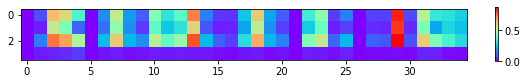

In [21]:
# визуализация показателей группы

plt.figure(figsize=(10,10))
plt.imshow(info, cmap='rainbow') #interpolation='nearest', )
plt.colorbar(location='right', anchor=(0, 0.5), shrink=0.1)
plt.show()

**По данному изображению можно проследить интенсивность того или иного stat (показателя) игроков.**

In [22]:
# Выведем словари статистик по частоте действий

a = {}
b = {}
c = {}

for i, val in enumerate(info[0,:]):
    
    if val > 0.7:
        a[data_group.columns[i]] = i
    elif val < 0.3:
        c[data_group.columns[i]] = i
    else:
        b[data_group.columns[i]] = i
        
print('Часто совершаемые действия: ', a)
print('Периодически совершаемые действия: ', b)
print('Редко совершаемые действия: ', c)

Часто совершаемые действия:  {'stat50': 13, 'stat107': 29}
Периодически совершаемые действия:  {'stat20': 2, 'stat24': 3, 'stat25': 4, 'stat35': 7, 'stat46': 10, 'stat47': 11, 'stat49': 12, 'stat72': 18, 'stat88': 22, 'stat89': 23, 'stat113': 31, 'stat120': 32, 'stat122': 33}
Редко совершаемые действия:  {'stat1': 0, 'stat9': 1, 'stat27': 5, 'stat32': 6, 'stat40': 8, 'stat44': 9, 'stat55': 14, 'stat58': 15, 'stat60': 16, 'stat70': 17, 'stat80': 19, 'stat81': 20, 'stat82': 21, 'stat90': 24, 'stat96': 25, 'stat97': 26, 'stat99': 27, 'stat102': 28, 'stat109': 30, 'stat125': 34}


# Алгоритм отнесения произвольного игрока по его игровым показателям к данной группе

## Autoencoder

**Создадим нейросетевой автоэнкодер, который мы научим восстанавливать примеры обучающей выборки, т.е. показатели игроков известной группы. Автоэнкодер подстроит свои веса так, чтобы ошибка была минимальна, если на вход будет подаваться пример похожий на примеры из обучающей выборки.**

**Соответственно, если мы на вход автоэнкодера подадим одного из неизвестных игроков и он хорошо восстановит данный пример (Loss будет того же порядка что и на обучающей выборке), то данного игра МОЖНО отнести к данной группе. А в противном случае, т.е. если Loss будет достаточно большим, то данного игрока НЕЛЬЗЯ отнести к данной группе (это выброс).**

In [46]:
# обучающие данные - игроки группы, тестовые - неизвестные игроки

X_train = data_group.values
print(X_train.shape)

X_test = data_new.values
X_test.shape

(49, 35)


(4, 35)

In [39]:
# Функция построения архитектуры автоэнкодера (модели автоэнкодера)

def creditcardAutoencoder(X_train): 

    '''
    Input:
        X_train - обучающая выборка
        
    Output:
        autoencoder - модель автоэнкодера
    '''          
    
    dataSize = X_train.shape[1] 
    dataInput = Input(shape=(dataSize, )) 
  
    x = Dense(dataSize, activation='relu')(dataInput) 
    x = Dense(16, activation='relu')(x) 
    x = Dense(64, activation='relu')(x) 
    x = Dense(16, activation='relu')(x) 
    x = Dense(dataSize, activation='linear')(x) 
  
    autoencoder = Model(inputs=dataInput, outputs=x) # 
  
    autoencoder.compile(optimizer='Adam', loss='mse')
    
    return autoencoder 

Epoch 1/30
10/10 [==============================] - 1s 3ms/step - loss: 0.1229
Epoch 2/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1122
Epoch 3/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1017
Epoch 4/30
10/10 [==============================] - 0s 4ms/step - loss: 0.0885
Epoch 5/30
10/10 [==============================] - 0s 4ms/step - loss: 0.0753
Epoch 6/30
10/10 [==============================] - 0s 3ms/step - loss: 0.0626
Epoch 7/30
10/10 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 8/30
10/10 [==============================] - 0s 3ms/step - loss: 0.0392
Epoch 9/30
10/10 [==============================] - 0s 3ms/step - loss: 0.0293
Epoch 10/30
10/10 [==============================] - 0s 3ms/step - loss: 0.0212
Epoch 11/30
10/10 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 12/30
10/10 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 13/30
10/10 [==============================

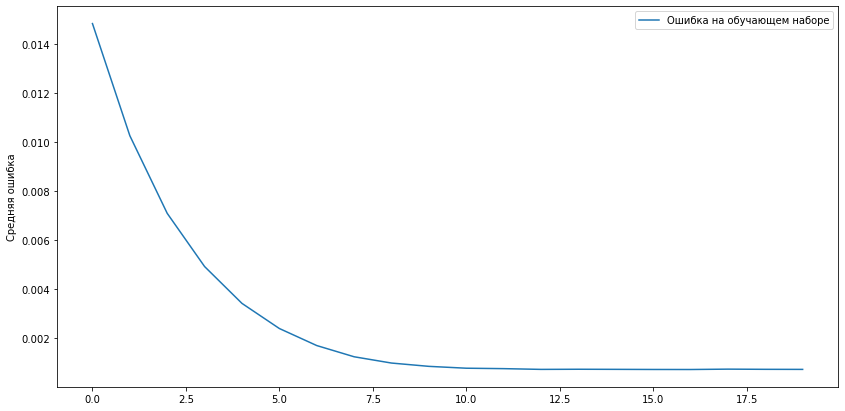

In [53]:
# обучаем модель и визуализируем Loss (в нашем случе это MSE)

model = creditcardAutoencoder(X_train)

history = model.fit(X_train, X_train,
                    epochs=30,
                    batch_size=5) # загружаем данные в модель(X_train'ы) и обучаем

#Выводим графики
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'][10:], 
         label='Ошибка на обучающем наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [54]:
predictions = model.predict(X_test) 
mse = np.mean(np.power(X_test - predictions, 2), axis=1) 
mse

array([0.00664971, 0.000438  , 0.00047657, 0.00462665])

In [57]:
pd1 = pd.DataFrame({'Loss (MSE)': mse}, index = ['player1', 'player2', 'player3', 'player4'])
pd1

,Loss (MSE)
player1,0.006650
player2,0.000438
player3,0.000477
player4,0.004627


In [60]:
# ошибка модели на последней эпохе
history.history['loss'][-1]

0.0007378239533863962

**У игроков 1 и 4 ошибки более высого порядка, чем ошибка модели на последней эпохе => этих игроков НЕЛЬЗЯ отнести к данной группе.**

**У игроков 2 и 3 ошибки одного порядка с ошибкой модели на последней эпохе => этих игроков МОЖНО отнести к данной группе.**
